In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Quantidade de grupos por área

In [2]:
def count_area(file):
  df = pd.read_csv(file, sep=";",lineterminator='\r')
  counts = df['Assunto'].value_counts().reset_index()
  counts.columns = ['Area', 'count']
  counts.rename(columns={'Area': 'Área', 'count': 'Quantidade'}, inplace=True)
  print(counts)
  counts.to_csv(f"contagem_area_grupo.csv", index=False)

In [ ]:
count_area("_resultados_grupos_estados_completo.csv")

                          Área  Quantidade
0   Ciências Exatas e da Terra         529
1                  Engenharias         278
2   Ciências Sociais Aplicadas         173
3            Ciências da Saúde          81
4             Ciências Humanas          67
5            Ciências Agrárias          36
6          Ciências Biológicas          21
7  Lingüística, Letras e Artes          18
8                        Outra          11


#### Tools

In [3]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', ]

#### Grupos de pesquisa

In [14]:
def plot_groups_creation(file='3.GroupsStates.csv'):
  plt.figure(figsize=(10,6))
  df = pd.read_csv(file, sep=";",lineterminator='\r')
  # Convert 'DATA_CRIACAO' column to datetime format
  df['DataCriacao'] = pd.to_datetime(df['DataCriacao'], format='%d/%m/%Y')

  # Extract the month and year from the 'DATA_CRIACAO' column
  df['MONTH_YEAR'] = df['DataCriacao'].dt.to_period('M')
  # Group the data by ano inicio and tipo, and count the occurrences
  grouped = df.groupby(['MONTH_YEAR', 'Assunto']).size().reset_index(name='count')

  # Pivot the data to have anos as index and tipos as columns
  pivoted = grouped.pivot(index='MONTH_YEAR', columns='Assunto', values='count')
  # print(grouped)

  # Plot the graph
  pivoted.plot(kind='line', linestyle="--", marker="o")
  plt.title('Grupos de pesquisa')
  plt.xlabel('Data de criação')
  plt.ylabel('Quantidade')
  plt.margins(x=0.05)
  plt.savefig('grupos_pesquisa.pdf', dpi=600, bbox_inches='tight')
  plt.show()

<Figure size 1000x600 with 0 Axes>

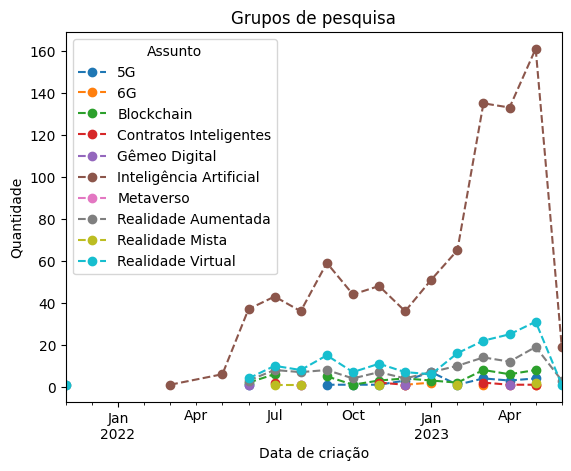

In [15]:
plot_groups_creation()

#### Mapa

In [ ]:
!pip install geobr
!pip install geopandas 
!pip install descartes

In [21]:
import geobr
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
import geopandas as gpd

def plot_map(csv_path='4.GroupsFinal.csv'):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_path, delimiter=';')

    # Group the DataFrame by 'estado' and count the rows per state
    state_counts = df['Estado'].value_counts().reset_index()
    state_counts.columns = ['Estado', 'count']
    brazil_states = [
        'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal',
        'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul',
        'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
        'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina',
        'São Paulo', 'Sergipe', 'Tocantins'
    ]
    for state in brazil_states:
      if state not in state_counts.Estado.values:
        state_counts.loc[len(state_counts.index)] = [state, 0] 
    # Read the GeoJSON data of Brazil states using geopandas
    with urlopen("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson") as response:
      gdf = gpd.read_file(response) # Javascrip object notation 

    # Merge the state counts DataFrame with the geopandas DataFrame based on 'estado' column
    merged = gdf.merge(state_counts, left_on='name', right_on='Estado', how='left')

    fig, ax = plt.subplots(figsize=(16, 9))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    merged.plot(column="count",
                # cmap="Blue_l",
                # cmap="viridis",
                cmap="plasma",
                # cmap="inferno",
                # cmap="magma",
                # cmap="cividis",
                legend=True,
                legend_kwds={
                    "label": "Quantidade",
                    "orientation": "horizontal",
                    "shrink": 0.6,
                },
                ax=ax, )
    plt.title("Grupos de Pesquisa")
    plt.savefig('grupos_mapa.pdf', dpi=600, bbox_inches='tight')


/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords'

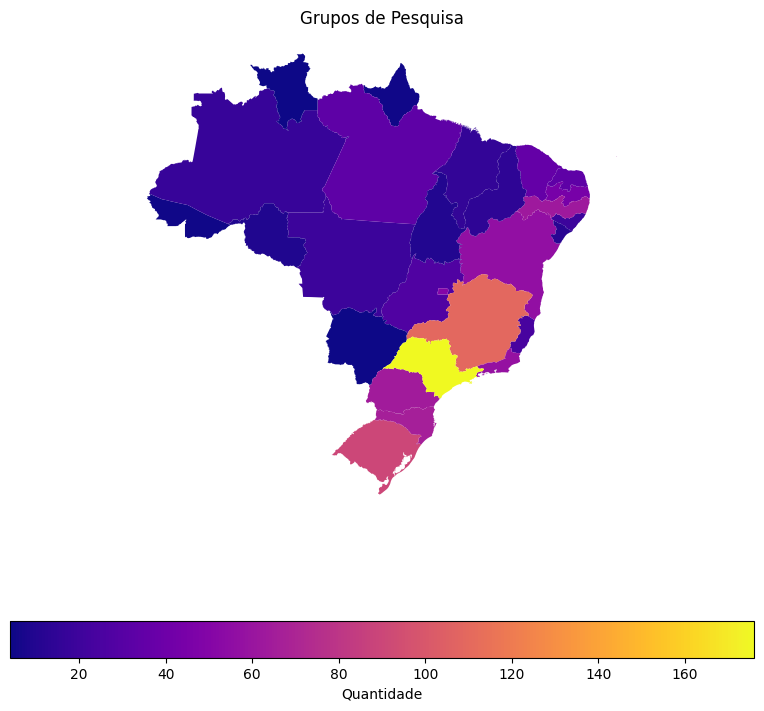

In [22]:
plot_map()